In [1]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pylab as plt

TensorFlow 1.x selected.


In [0]:
dataX = np.linspace(-1.0, 1, 300)[:, np.newaxis]

In [0]:
noise = np.random.normal(0, 0.02, dataX.shape)
dataY = np.square(dataX) + noise 

In [0]:
import tensorflow as tf

In [0]:
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [0]:
L1Weights = tf.Variable(tf.random_normal([1,10]))
L1bias = tf.Variable(tf.zeros([1,10]))
L1_Wx_plus_bias = tf.matmul(x,L1Weights) + L1bias
L1 = tf.nn.tanh(L1_Wx_plus_bias)

In [0]:
L2Weights = tf.Variable(tf.random_normal([10,1]))
L2bias = tf.Variable(tf.zeros([1,1]))
L2_Wx_plus_bias = tf.matmul(L1,L2Weights) + L2bias
prediction = tf.nn.tanh(L2_Wx_plus_bias)


In [0]:
loss = tf.reduce_mean(tf.square(y-prediction))

In [0]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:dataX,y:dataY})
    prediction_value = sess.run(prediction,feed_dict={x:dataX})

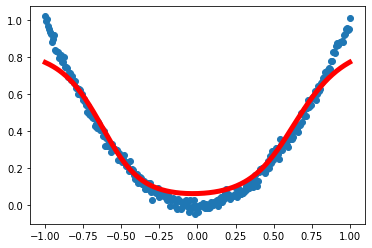

In [20]:
plt.figure()
plt.scatter(dataX,dataY)
plt.plot(dataX,prediction_value,'r-',lw=5)
plt.show()